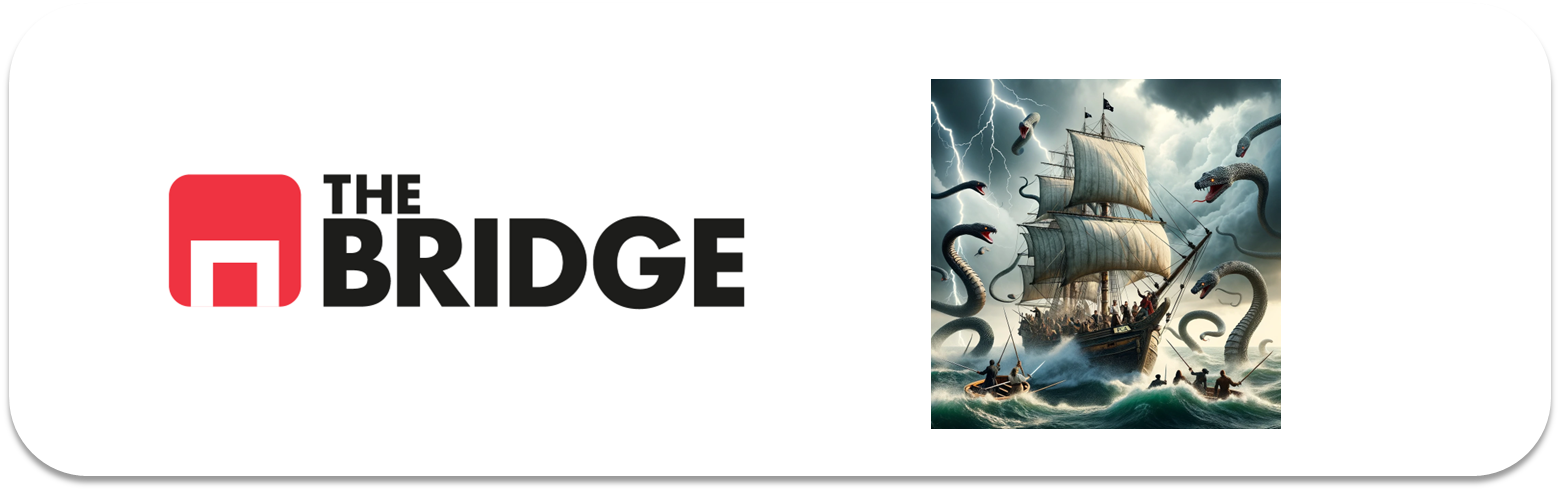

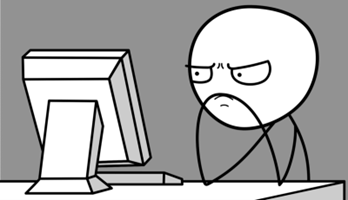

Para ejercitarte y afianzar lo aprendido sobre **Seleccion de Features**, completa los siguientes ejercicios. Recuerda que necesitarás datos que están en el directorio data que acompaña al notebook (búscalo en el repositorio de ejercicios)
  
La solución a los mismos las tienes ya, intenta no mirarlos de primeras pero no dejes de hacerlo cuando hayas terminado por si te pudieran aportar.

## Feature selection: Breast Cancer Winsconsin

El objetivo de este grupo de ejercicio es dar a entender la importancia de la selección de características (features), así como probar distintos métodos de reducción de características (features) y qué influencia puede tener el reducir features en el perfomance de un modelo. Nuestro target para evaluar el perfomance será si estamos ante tumores malignos o benignos.

Vamos a trabajar con el dataset de Breast Cancer Winsconsin, datos tomados a partir de radiografías.

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook

In [130]:
import bootcampviztools as bt
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, balanced_accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler

### Ejercicio 1:

Carga los datos y haz una primera inspección de los mismos y comenta lo que creas conveniente sobre las features y su relación entre sí (pero sin analizarlas numéricamente)

In [131]:
df_wis=pd.read_csv("./data/breastcancer-winsconsin.csv")
df_wis

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [132]:
df_wis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [133]:
df_wis.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [134]:
df_wis.nunique()

id                         569
diagnosis                    2
radius_mean                456
texture_mean               479
perimeter_mean             522
area_mean                  539
smoothness_mean            474
compactness_mean           537
concavity_mean             537
concave points_mean        542
symmetry_mean              432
fractal_dimension_mean     499
radius_se                  540
texture_se                 519
perimeter_se               533
area_se                    528
smoothness_se              547
compactness_se             541
concavity_se               533
concave points_se          507
symmetry_se                498
fractal_dimension_se       545
radius_worst               457
texture_worst              511
perimeter_worst            514
area_worst                 544
smoothness_worst           411
compactness_worst          529
concavity_worst            539
concave points_worst       492
symmetry_worst             500
fractal_dimension_worst    535
Unnamed:

### Ejercicio 2:

Descarta las características que evidentemente no aportan información.

In [135]:
df_wis=df_wis.drop(columns="Unnamed: 32")
df_wis=df_wis.set_index("id",drop=True)
df_wis.index.name=None
df_wis

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


### Ejercicio 3: 

Divide en train y test. Analiza el target de forma breve.

In [136]:
df_wis["diagnosis"]=df_wis["diagnosis"].replace({"B":0,"M":1})

C:\Users\Guillermo\AppData\Local\Temp\ipykernel_13144\709916210.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_wis["diagnosis"]=df_wis["diagnosis"].replace({"B":0,"M":1})


In [137]:
train_set,test_set= train_test_split(df_wis,test_size=0.2,random_state=42)

In [138]:
target="diagnosis"

In [139]:
X_train= train_set.drop(columns=target)
y_train= train_set[target]
X_test= test_set.drop(columns=target)
y_test= test_set[target]

In [140]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(455, 30)
(455,)
(114, 30)
(114,)


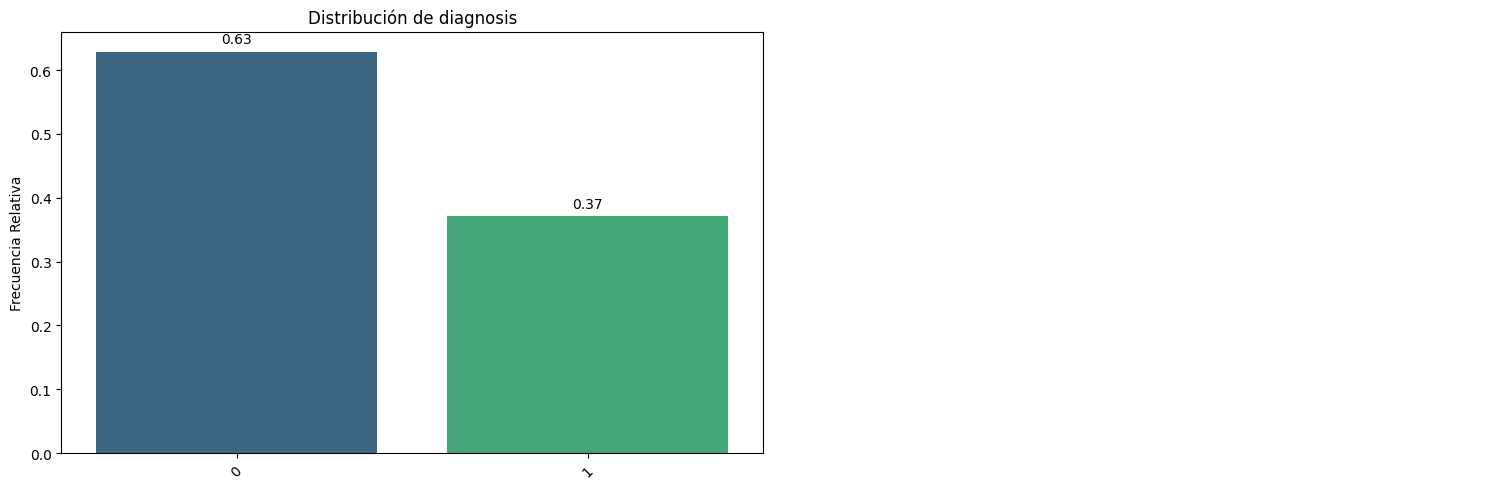

In [141]:
bt.pinta_distribucion_categoricas(train_set,[target],relativa=True,mostrar_valores=True) #Desbalanceado pero no exageradamente

### Ejercicio 4: MiniEDA (I) Análisis Visual

Realiza un análisis visual de las features y haz tu selección de primera "división" (que luego usaremos para comparar con otros métodos de selección).

radius_mean


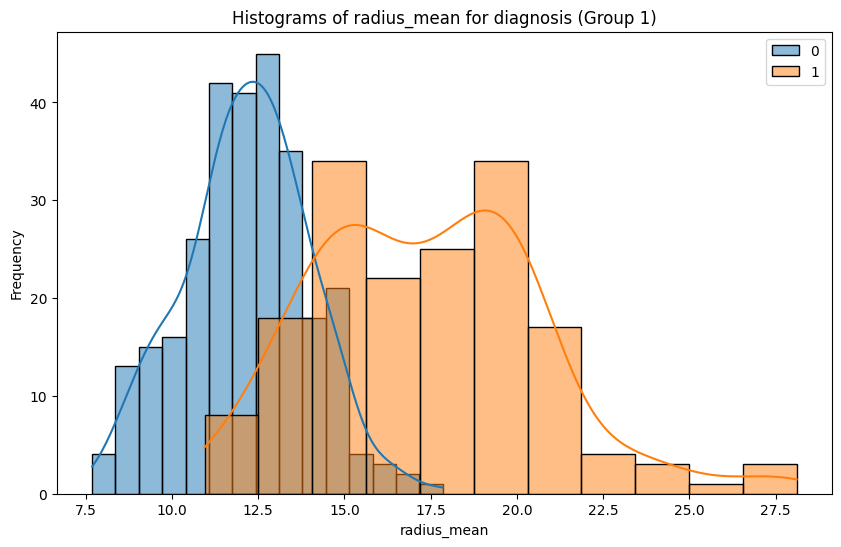

texture_mean


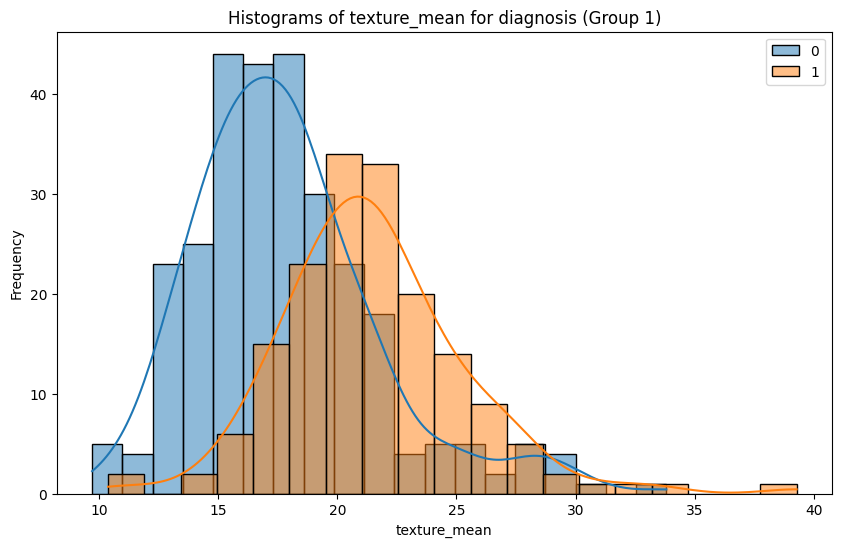

perimeter_mean


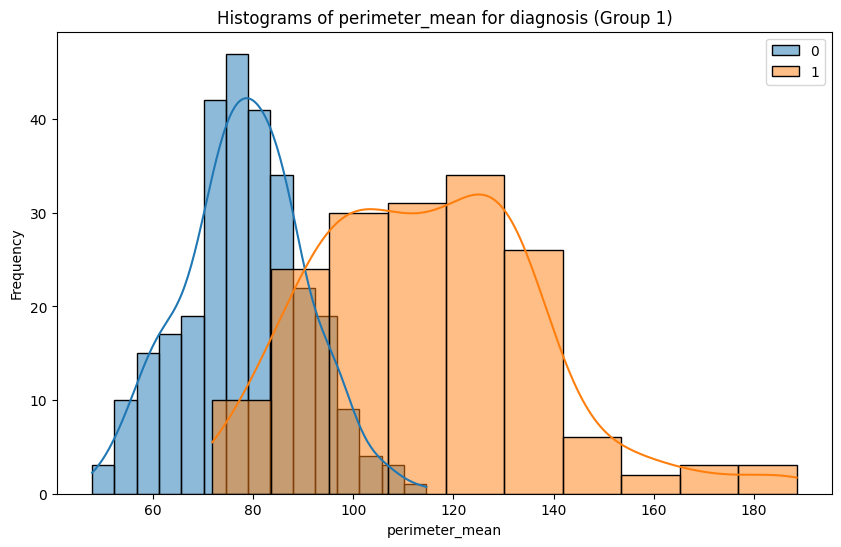

area_mean


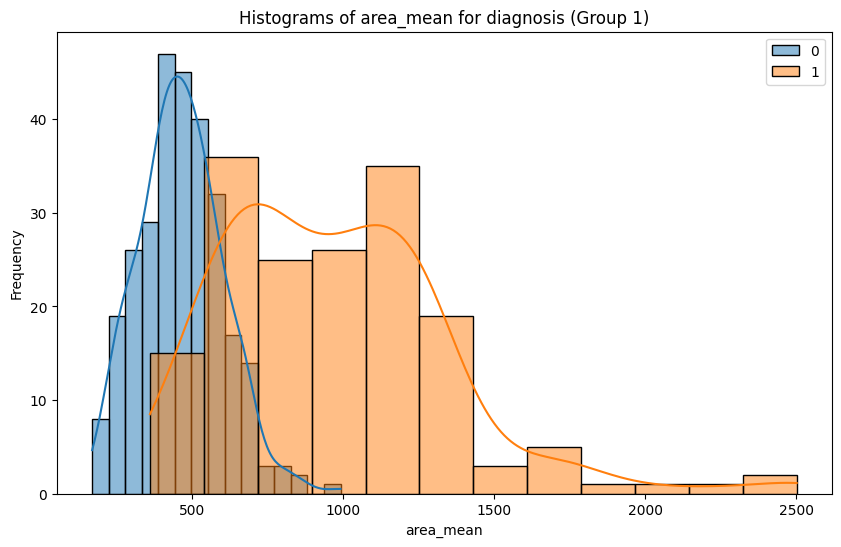

smoothness_mean


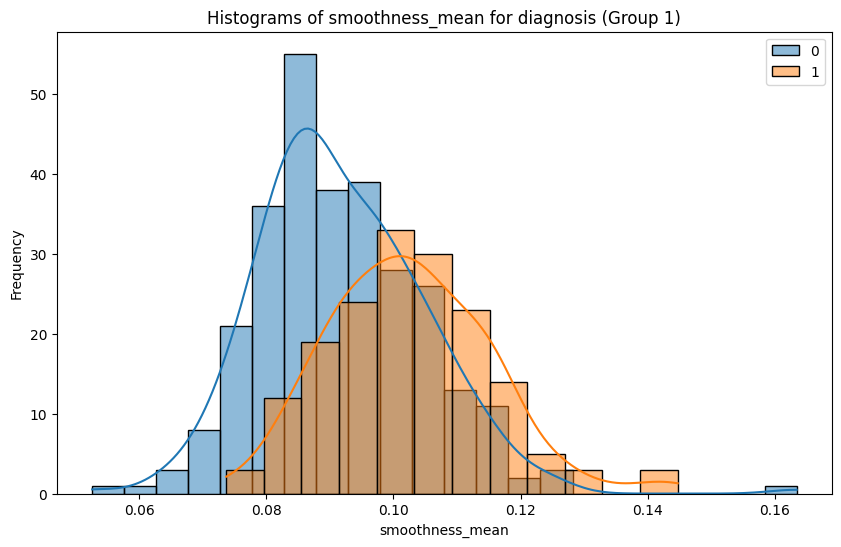

compactness_mean


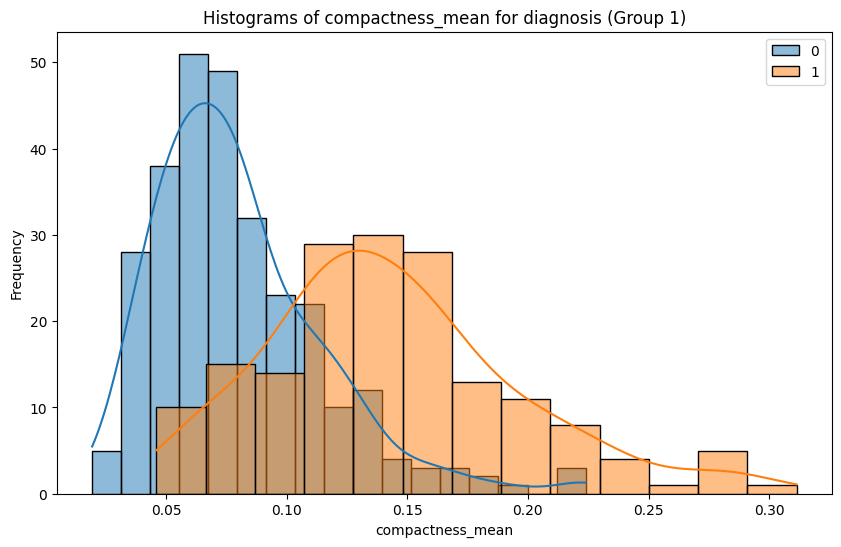

concavity_mean


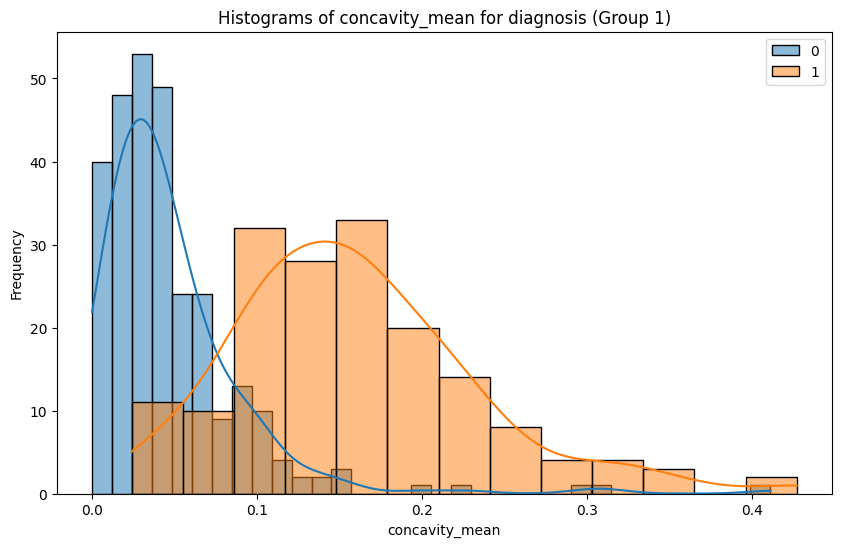

concave points_mean


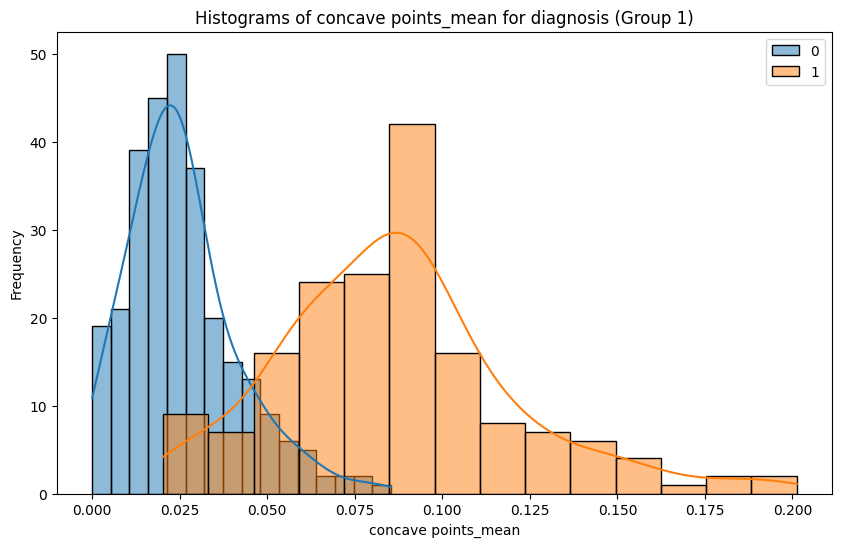

symmetry_mean


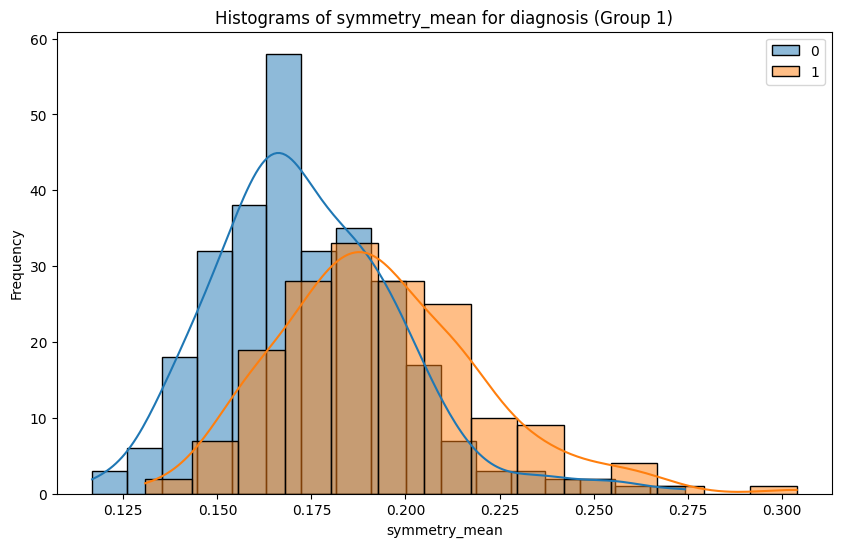

fractal_dimension_mean


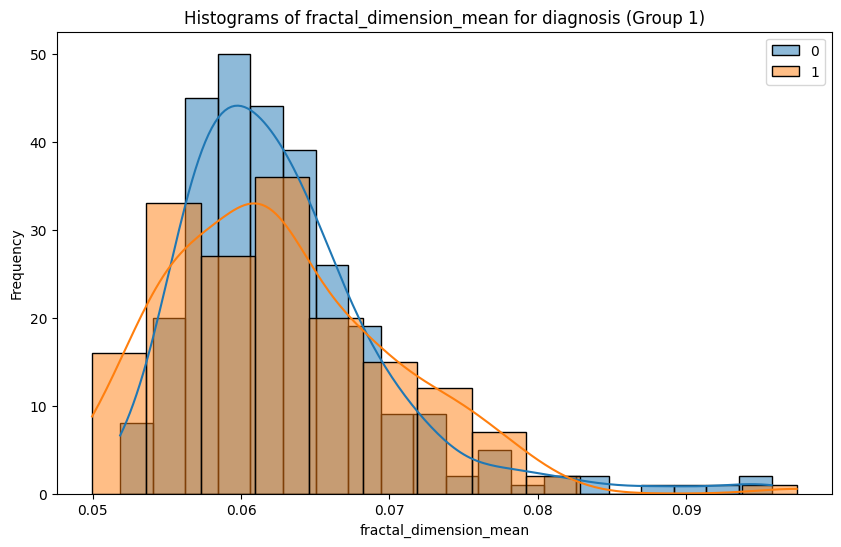

radius_se


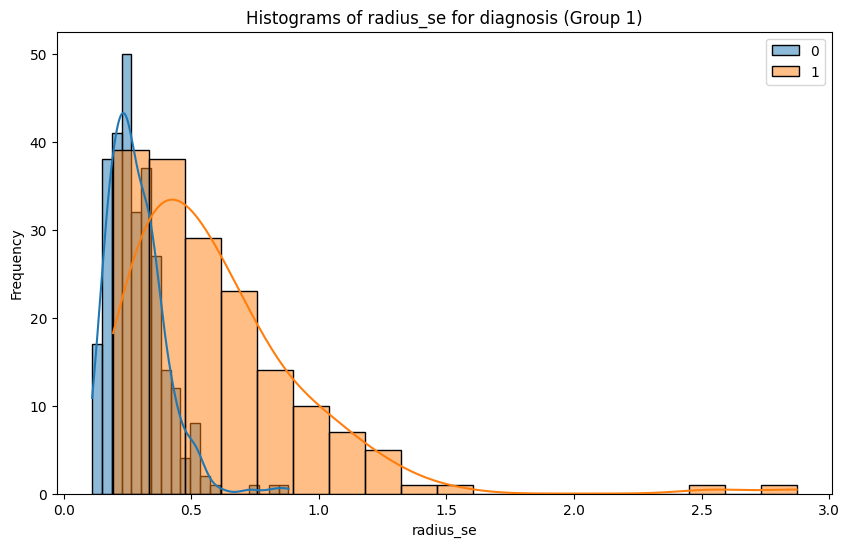

texture_se


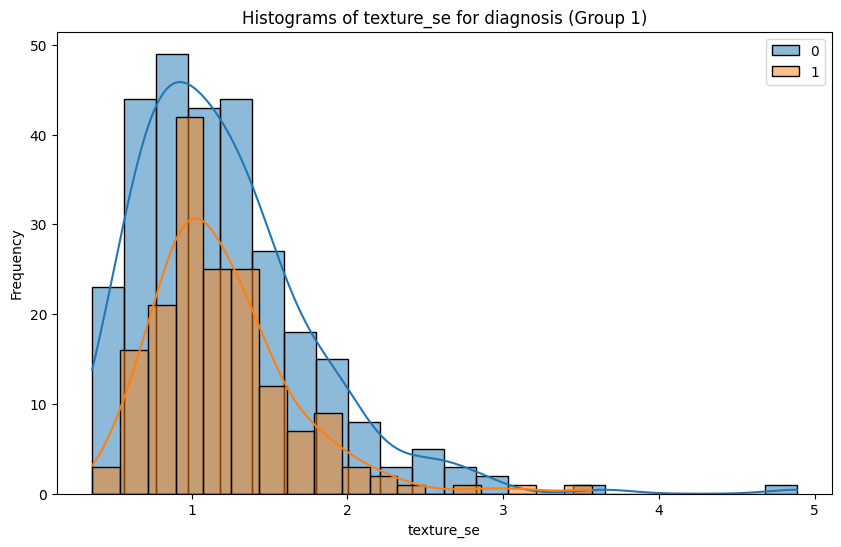

perimeter_se


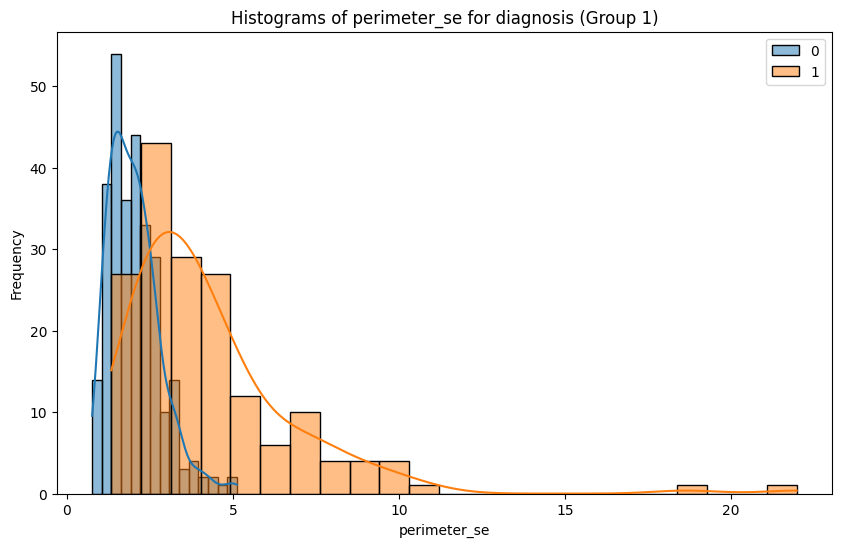

area_se


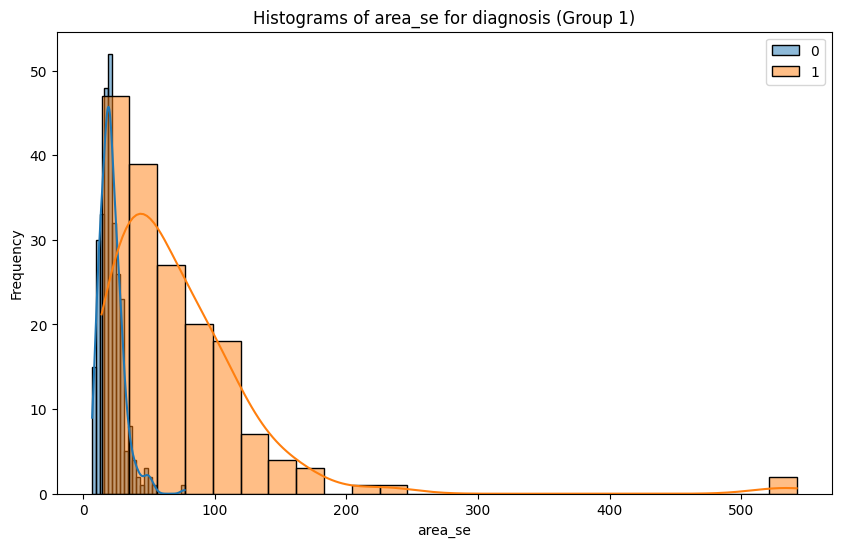

smoothness_se


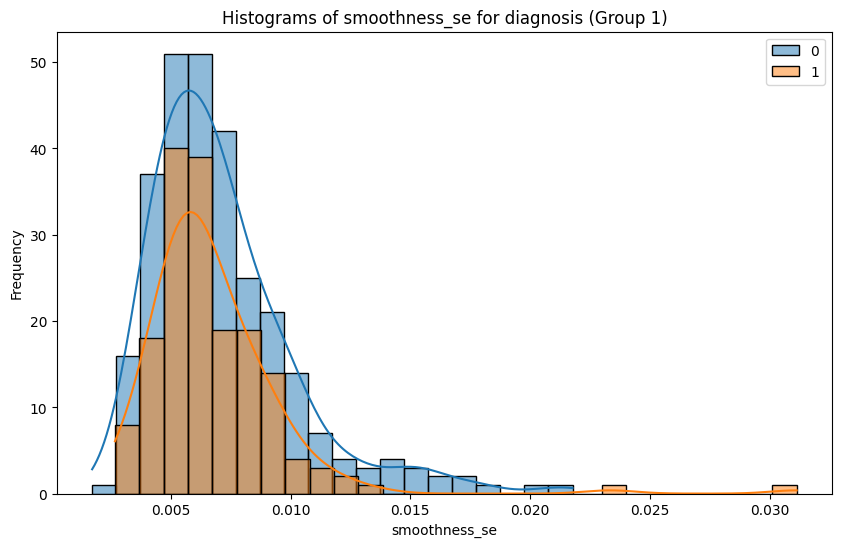

compactness_se


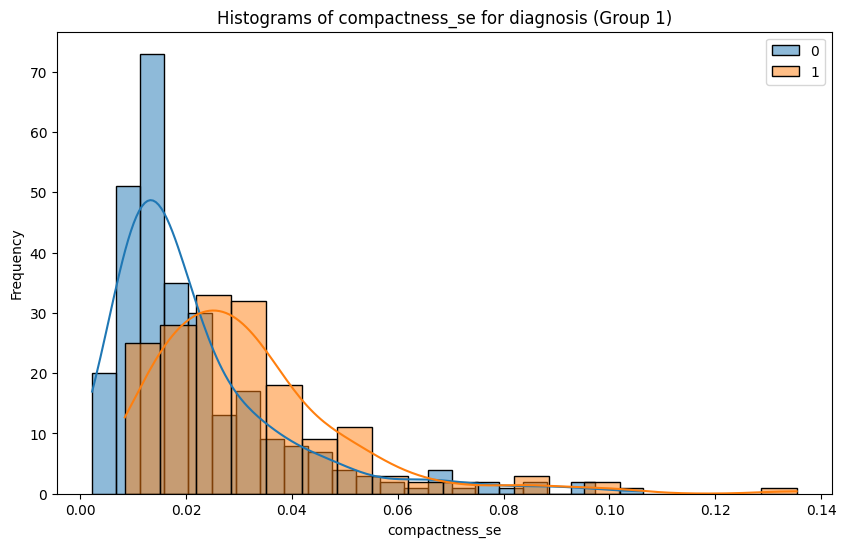

concavity_se


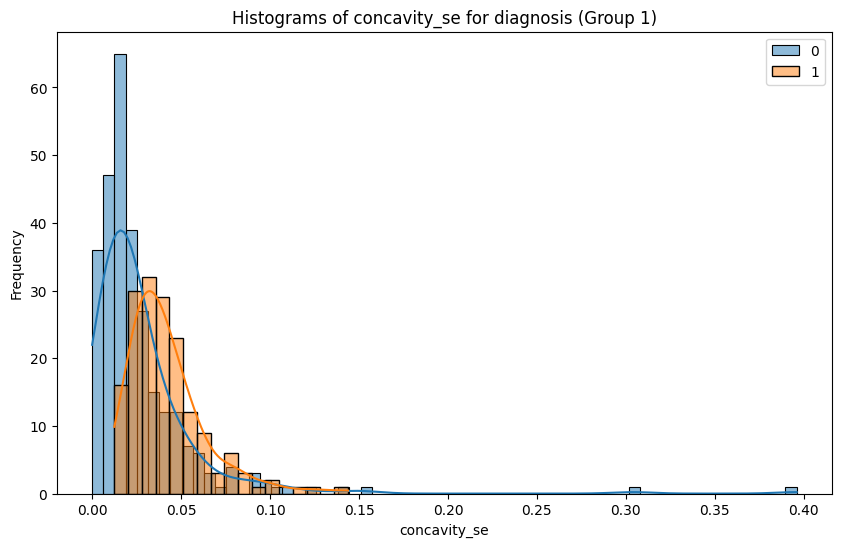

concave points_se


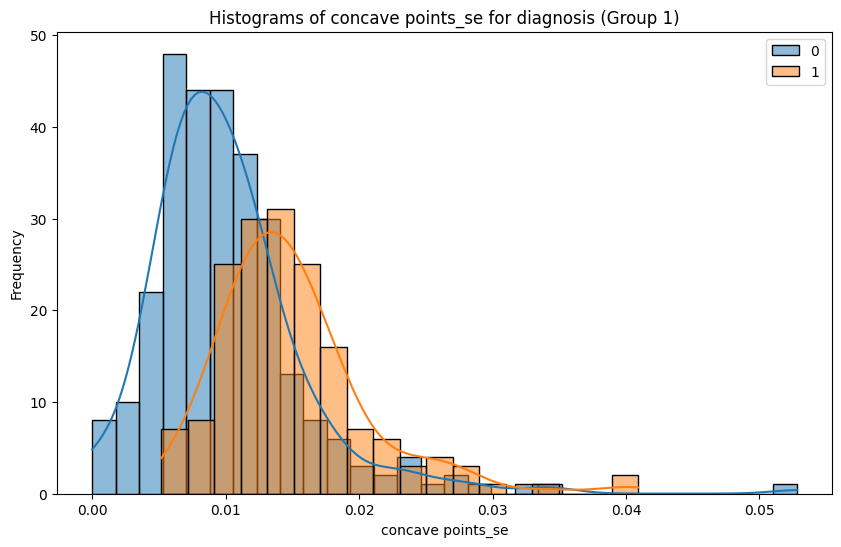

symmetry_se


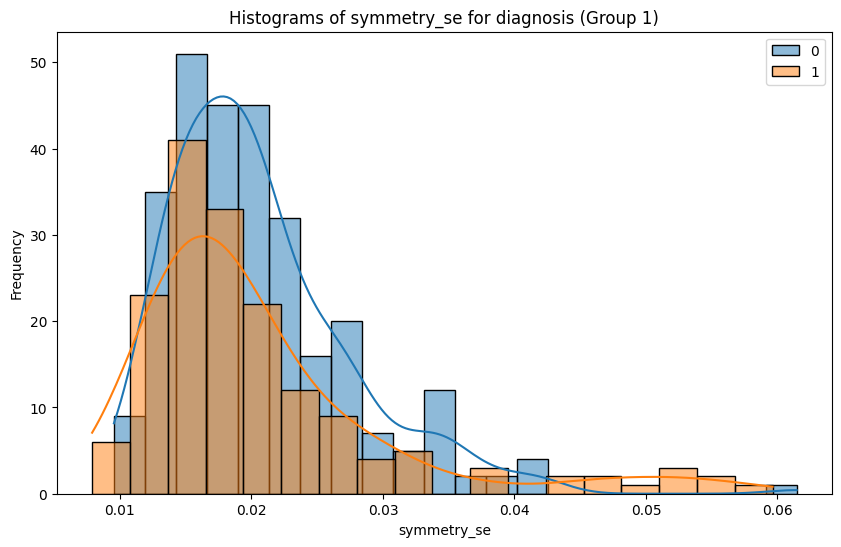

fractal_dimension_se


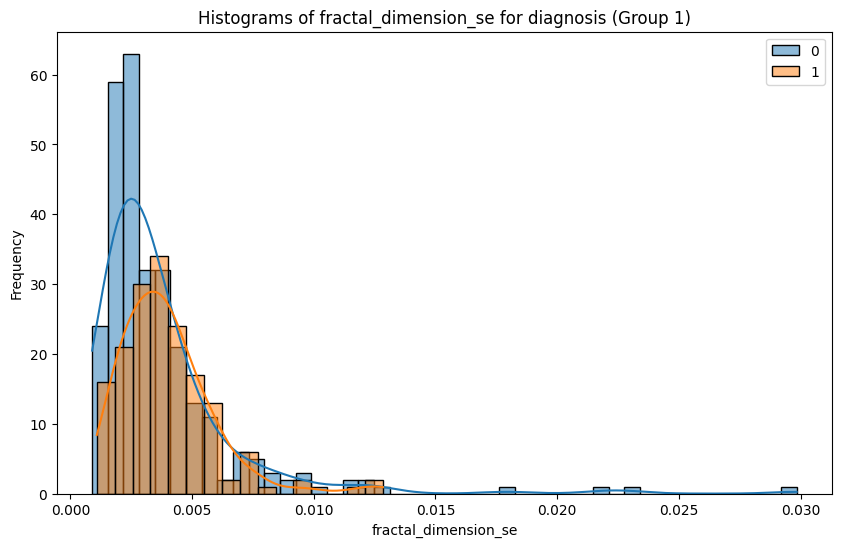

radius_worst


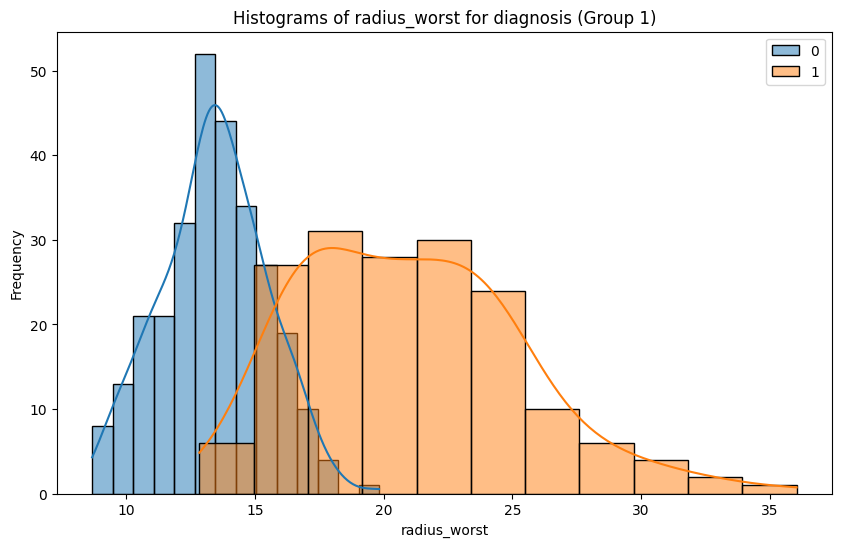

texture_worst


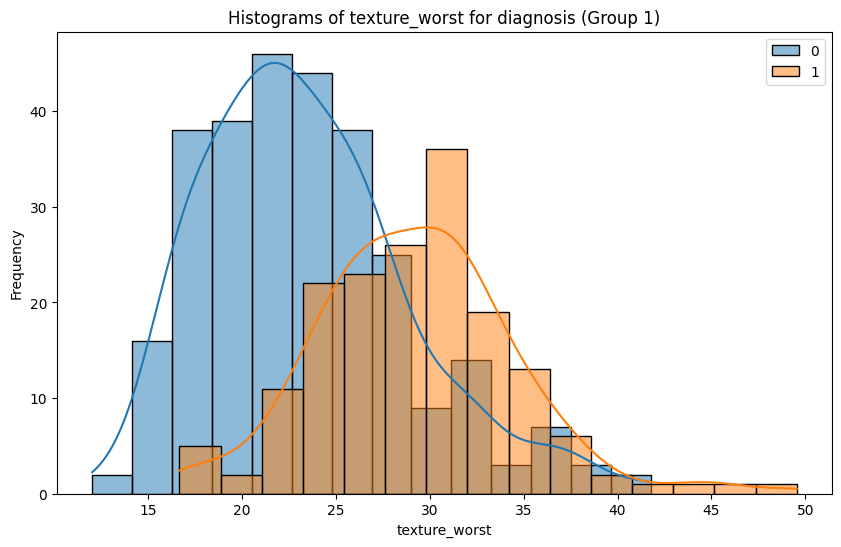

perimeter_worst


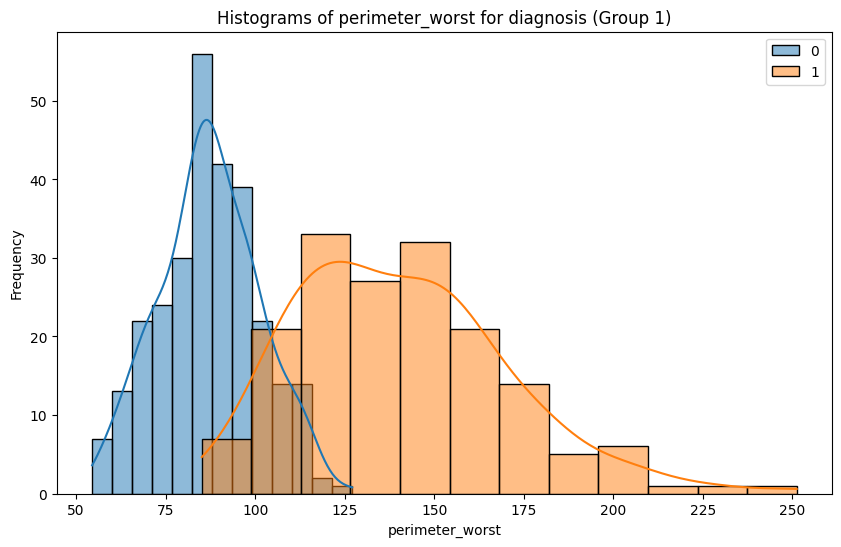

area_worst


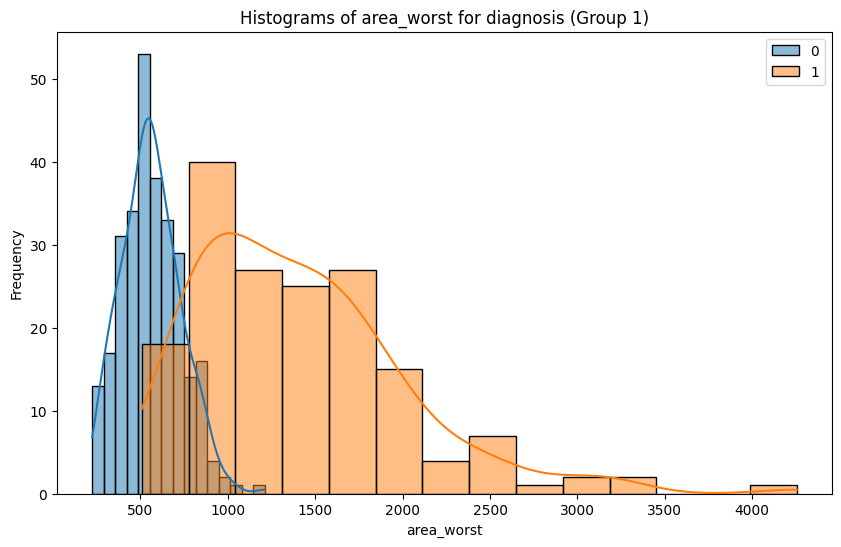

smoothness_worst


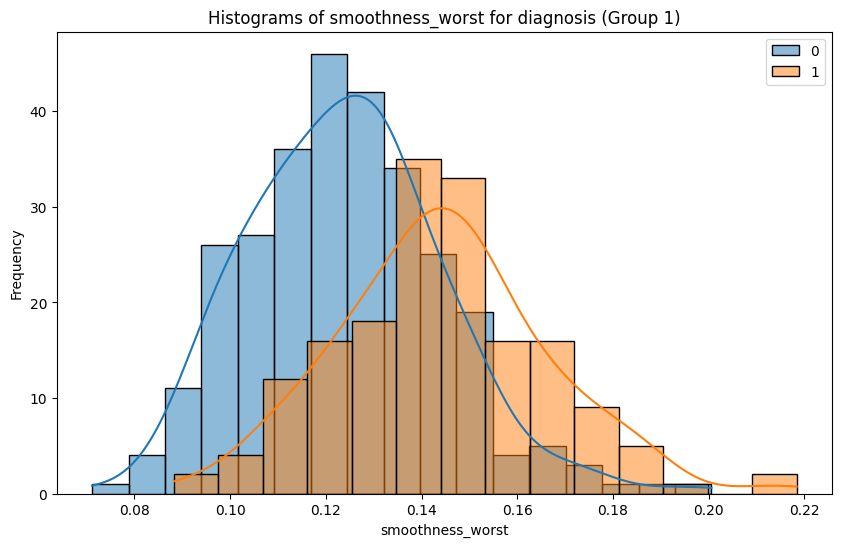

compactness_worst


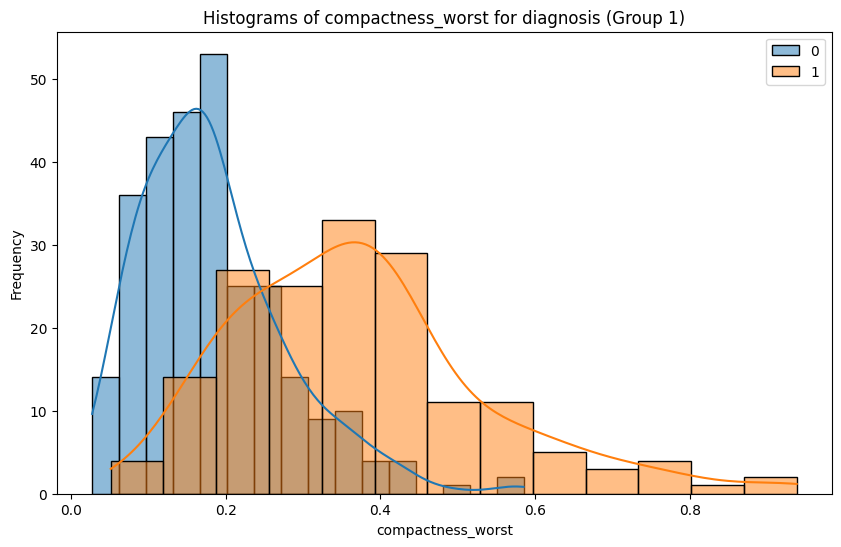

concavity_worst


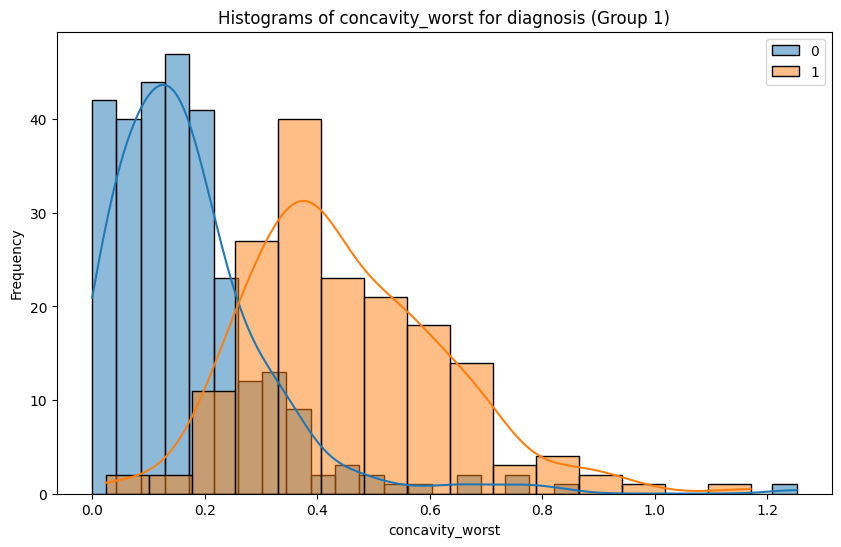

concave points_worst


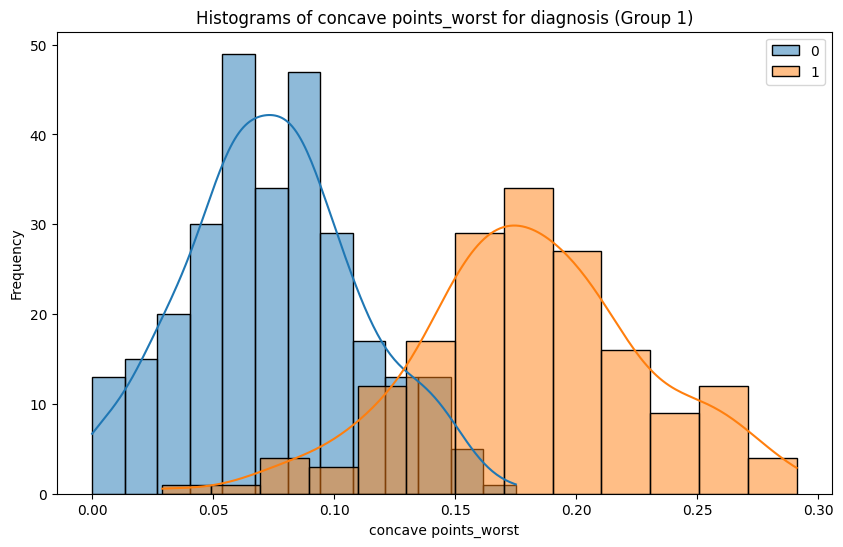

symmetry_worst


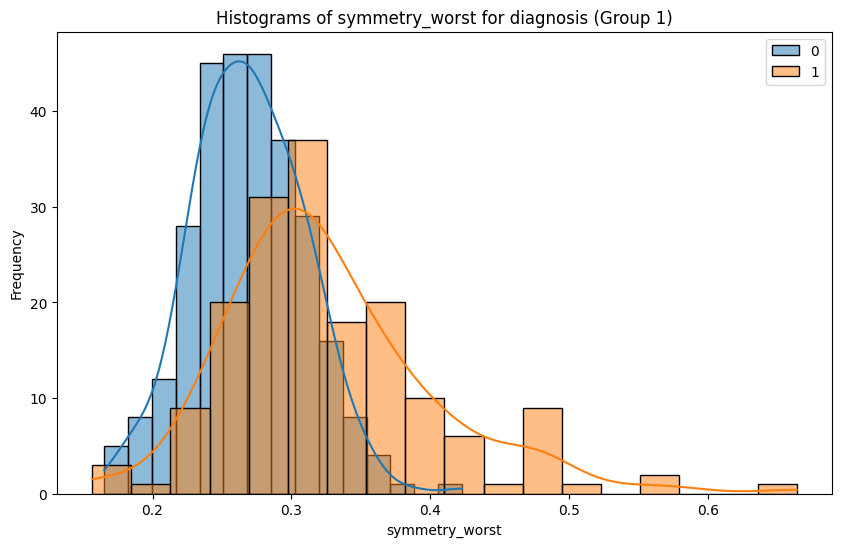

fractal_dimension_worst


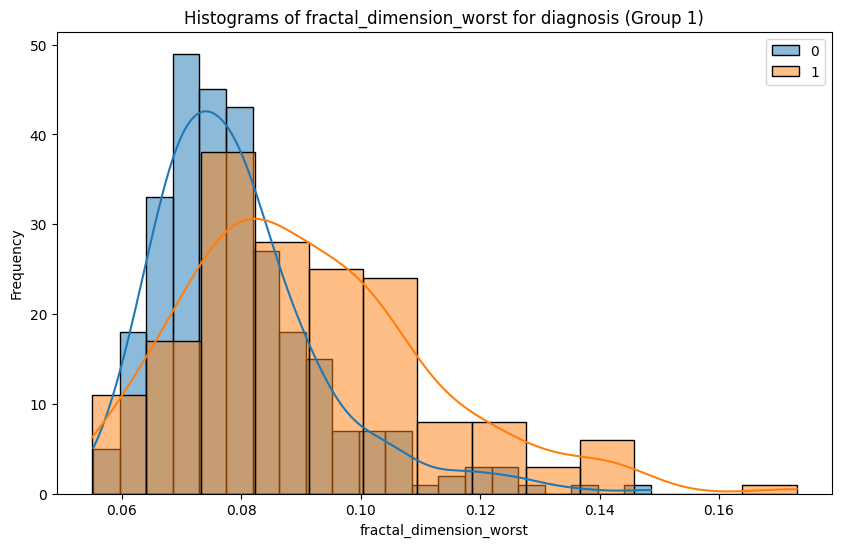

In [142]:
for col in X_train.columns.tolist():
    print(col)
    bt.plot_grouped_histograms(train_set,target,col,group_size=2)

In [143]:
features_a_quitar=["texture_se","smoothness_se"]
features_menos_importantes= ["symmetry_se","fractal_dimension_se"]

### Ejercicio 5

Observa correlaciones entre las features. Utiliza un gráfico apropiado para ello. ¿Crees que sea posible eliminar algunas features para mejorar el modelo? (No hace falta que lo hagas ahora, lo haremos si es necesario en un ejercicio posterior)

<Axes: >

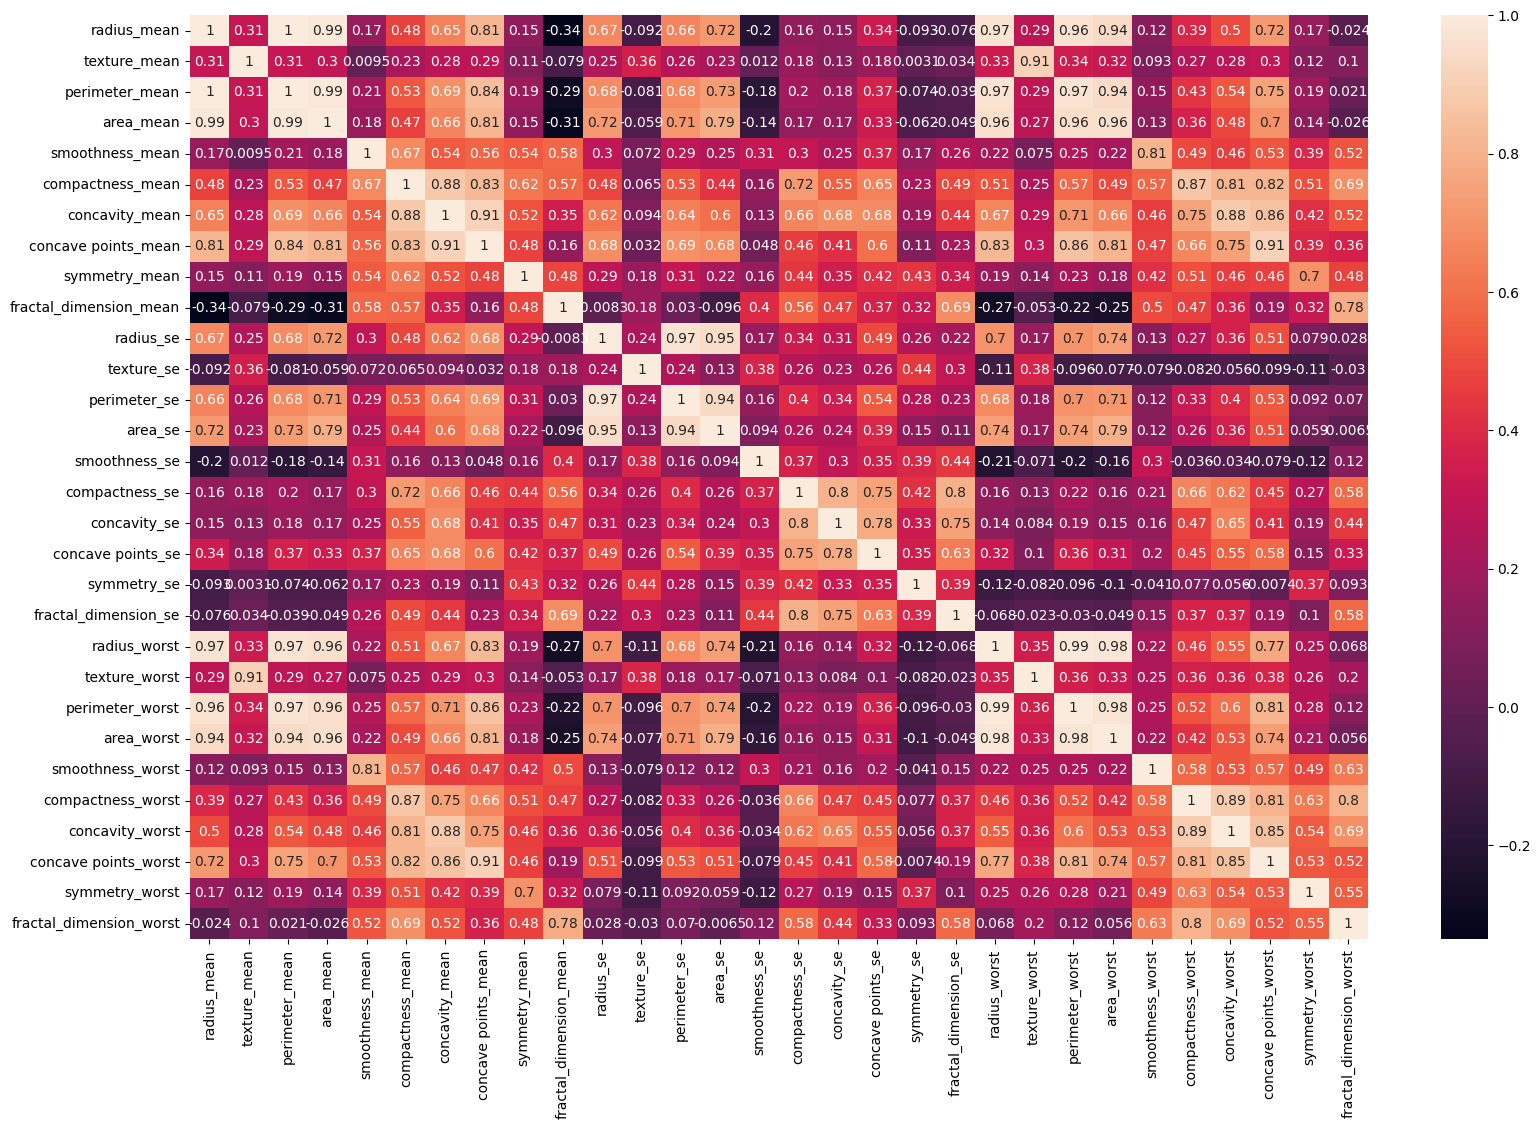

In [144]:
plt.figure(figsize=(19,12))
sns.heatmap(X_train.corr(),annot=True)

In [145]:
tuplas_relacionadas = []
for i in range(len(X_train.columns)):
    for j in range(i + 1, len(X_train.columns)): 
        col1 = X_train.columns[i]
        col2 = X_train.columns[j]
        correl = X_train[col1].corr(X_train[col2]) 

        if abs(correl) > 0.9: 
            tuplas_relacionadas.append((col1, col2))

print(tuplas_relacionadas)

[('radius_mean', 'perimeter_mean'), ('radius_mean', 'area_mean'), ('radius_mean', 'radius_worst'), ('radius_mean', 'perimeter_worst'), ('radius_mean', 'area_worst'), ('texture_mean', 'texture_worst'), ('perimeter_mean', 'area_mean'), ('perimeter_mean', 'radius_worst'), ('perimeter_mean', 'perimeter_worst'), ('perimeter_mean', 'area_worst'), ('area_mean', 'radius_worst'), ('area_mean', 'perimeter_worst'), ('area_mean', 'area_worst'), ('concavity_mean', 'concave points_mean'), ('concave points_mean', 'concave points_worst'), ('radius_se', 'perimeter_se'), ('radius_se', 'area_se'), ('perimeter_se', 'area_se'), ('radius_worst', 'perimeter_worst'), ('radius_worst', 'area_worst'), ('perimeter_worst', 'area_worst')]


In [146]:
features_exceso_colineal=['radius_worst', 'perimeter_worst', 'area_worst','texture_worst','concave points_mean','radius_se', 'perimeter_se','radius_worst', 'perimeter_worst','perimeter_mean', 'area_mean']
X_train_reduc_visual= X_train.copy().drop(columns=features_exceso_colineal)
X_train_reduc_visual= X_train_reduc_visual.drop(columns=features_a_quitar)

In [147]:
X_test_reduc_visual= X_test.copy().drop(columns=features_exceso_colineal)
X_test_reduc_visual= X_test_reduc_visual.drop(columns=features_a_quitar)

In [148]:
tuplas_relacionadas_v2 = []
for i in range(len(X_train_reduc_visual.columns)):
    for j in range(i + 1, len(X_train_reduc_visual.columns)): 
        col1 = X_train_reduc_visual.columns[i]
        col2 = X_train_reduc_visual.columns[j]
        correl = X_train_reduc_visual[col1].corr(X_train_reduc_visual[col2]) 

        if abs(correl) > 0.9: 
            tuplas_relacionadas_v2.append((col1, col2))

print(tuplas_relacionadas_v2)

[]


In [149]:
print(len(X_train_reduc_visual.columns))
X_train_reduc_visual.columns #Me he quitado 12 features

19


Index(['radius_mean', 'texture_mean', 'smoothness_mean', 'compactness_mean',
       'concavity_mean', 'symmetry_mean', 'fractal_dimension_mean', 'area_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'smoothness_worst', 'compactness_worst',
       'concavity_worst', 'concave points_worst', 'symmetry_worst',
       'fractal_dimension_worst'],
      dtype='object')

### Ejercicio 6:

Entrena (con validación cruzada) un modelo de RandomForestClassifier (con max_depth a 5) con todas las features (ojo incluso las que descartamos en el ejercicio 4) y guarda el perfomance ("balanced_accuracy") en test en una variable. Será nuestro base line de comparación

In [150]:
rf_base= RandomForestClassifier(max_depth=5,random_state=42)

In [151]:
rf_cross_scores=cross_val_score(rf_base,X_train,y_train,scoring="balanced_accuracy",cv=5)
rf_mean_score= rf_cross_scores.mean()
rf_mean_score

0.9539121868843232

In [152]:
rf_base.fit(X_train,y_train)
rf_test_predict= rf_base.predict(X_test)
rf_test_score=balanced_accuracy_score(y_test,rf_test_predict)
print(rf_test_score)

0.9580740255486406


### Ejercicio 7

Vamos a emplear nuestras features del análisis visual pero descartando variables correladas entre sí (emplea la matriz ya obtenida en el ejercicio 5 o bien cualquier medio que creas conveniente). Descarta features y muestra la matriz de correlación para la selección final (recuerda, parte de la lista creada en el ejercicio 4)

<Axes: >

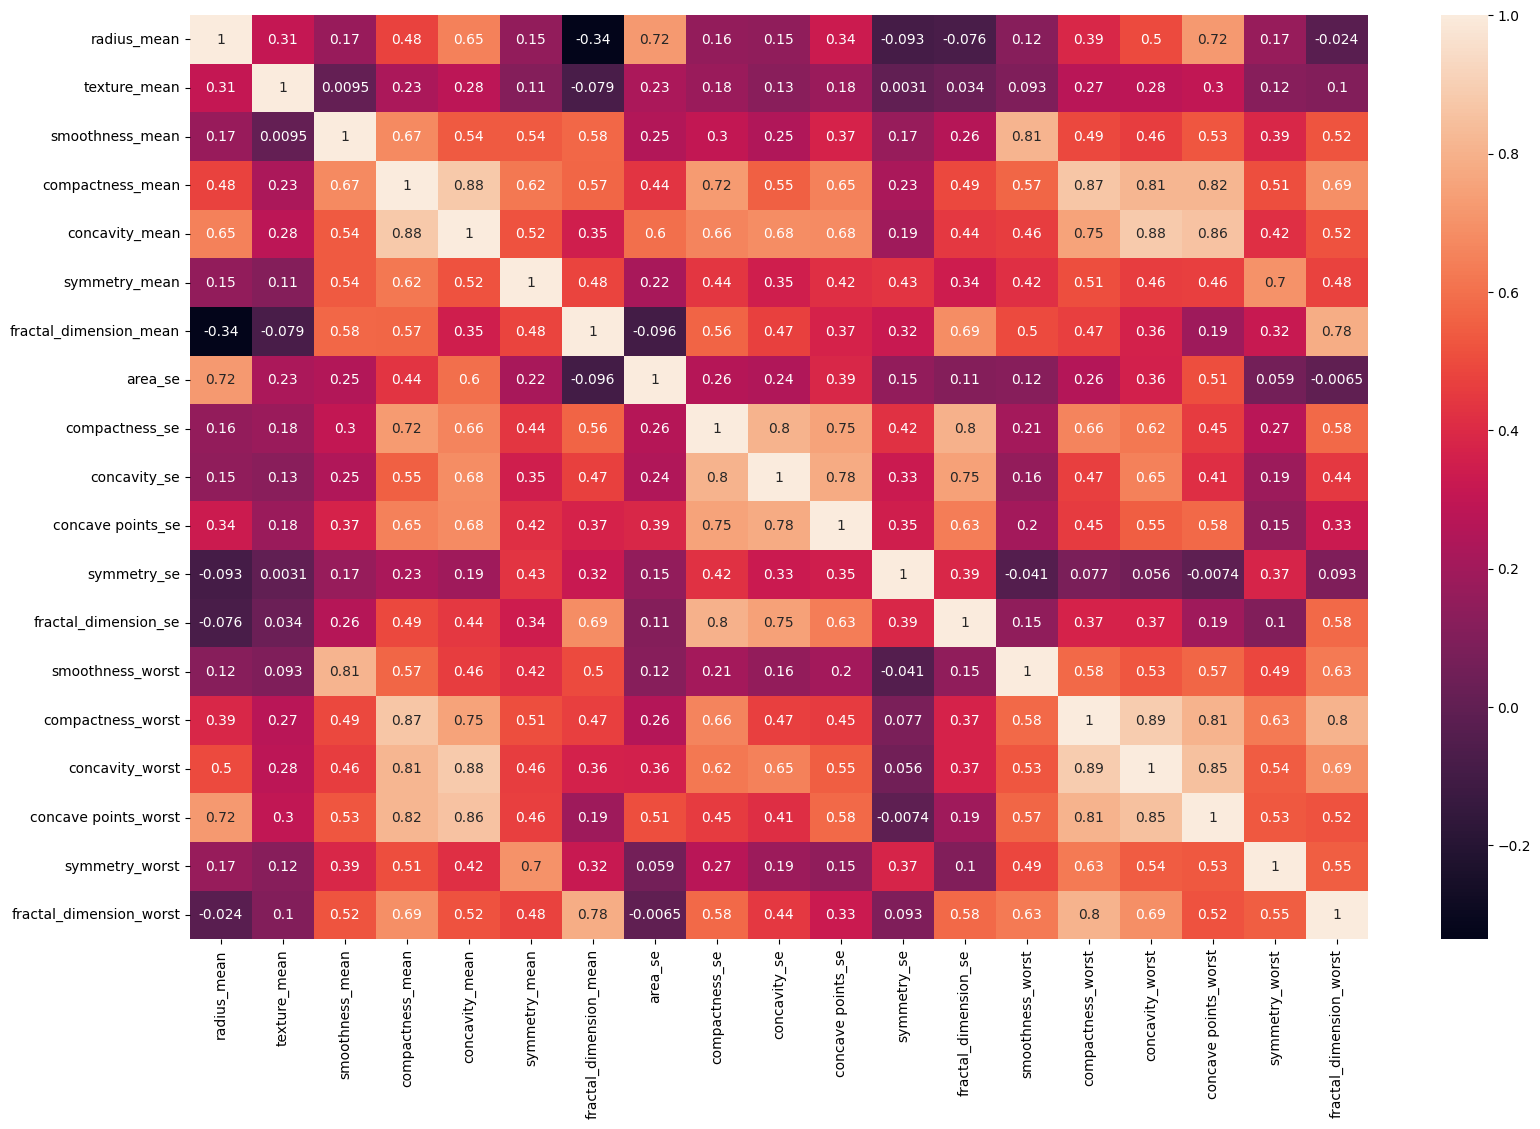

In [153]:
plt.figure(figsize=(19,12))
sns.heatmap(X_train_reduc_visual.corr(),annot=True)

### Ejercicio 8

Evalúa tu primer feature reduction. Entrena un modelo y evalúa su perfomance con los features que seleccionaste en el ejercicio anterios (emplea la validación cruzada)

In [154]:
rf_reduc_visual= RandomForestClassifier(max_depth=5,random_state=42)

rf_reduc_visual_cross_scores=cross_val_score(rf_reduc_visual,X_train_reduc_visual,y_train,scoring="balanced_accuracy",cv=5)
rf_reduc_visual_mean_score= rf_reduc_visual_cross_scores.mean()
print(f"cross valid score = {rf_reduc_visual_mean_score}, diferencia respecto al modelo base {rf_mean_score - rf_reduc_visual_mean_score}")

rf_reduc_visual.fit(X_train_reduc_visual,y_train)
rf_reduc_visual_test_predict= rf_reduc_visual.predict(X_test_reduc_visual)
rf_reduc_visual_test_score=balanced_accuracy_score(y_test,rf_reduc_visual_test_predict)
print(f"test score = {rf_reduc_visual_test_score}, diferencia respecto al modelo base {rf_test_score - rf_reduc_visual_test_score}")

cross valid score = 0.9339447641785636, diferencia respecto al modelo base 0.019967422705759574
test score = 0.9510317720275139, diferencia respecto al modelo base 0.007042253521126751


### Ejercicio 9

Prueba ahora a hacer una feature selection utilizando ANOVA. Compara la validación cruzada con la del modelo baseline y con la del modelo anterior. (Pista: SelectKbest)

In [155]:
from scipy import stats
from sklearn.feature_selection import SelectKBest, f_classif

selector = SelectKBest(f_classif)
x_data_kbest = selector.fit_transform(X_train, y_train)
X_train_kbest = pd.DataFrame(x_data_kbest, columns = selector.get_feature_names_out())
x_test_data_kbest=selector.transform(X_test)
X_test_kbest = pd.DataFrame(x_test_data_kbest, columns = selector.get_feature_names_out())
X_test_kbest

,radius_mean,perimeter_mean,area_mean,concavity_mean,concave points_mean,radius_worst,perimeter_worst,area_worst,concavity_worst,concave points_worst
0,12.47,81.09,481.9,0.08005,0.03821,14.97,96.05,677.9,0.2671,0.10150
1,18.94,123.60,1130.0,0.10800,0.07951,24.86,165.90,1866.0,0.2687,0.17890
2,15.46,101.70,748.9,0.14660,0.08087,19.26,124.90,1156.0,0.3791,0.15140
3,12.40,81.47,467.8,0.07741,0.02799,12.88,89.61,515.8,0.2403,0.07370
4,11.54,74.65,402.9,0.06737,0.02594,12.26,78.78,457.8,0.1797,0.06918
...,...,...,...,...,...,...,...,...,...,...
109,14.64,94.21,666.0,0.05192,0.02791,16.46,106.00,831.0,0.2437,0.07828
110,16.07,104.10,817.7,0.09769,0.06638,19.77,128.80,1223.0,0.2829,0.15200
111,11.52,73.87,406.3,0.04328,0.02929,12.65,80.88,491.8,0.1804,0.09608
112,14.22,92.55,623.9,0.11030,0.04408,15.75,102.50,764.0,0.3064,0.08219


In [156]:
rf_kbest= RandomForestClassifier(max_depth=5,random_state=42)

rf_kbest_cross_scores=cross_val_score(rf_kbest,X_train_kbest,y_train,scoring="balanced_accuracy",cv=5)
rf_kbest_mean_score= rf_kbest_cross_scores.mean()
print(f"cross valid score = {rf_kbest_mean_score}, diferencia respecto al modelo base {rf_mean_score - rf_kbest_mean_score}")

rf_kbest.fit(X_train_kbest,y_train)
rf_kbest_test_predict= rf_kbest.predict(X_test_kbest)
rf_kbest_test_score=balanced_accuracy_score(y_test,rf_kbest_test_predict)
print(f"test score = {rf_kbest_test_score}, diferencia respecto al modelo base {rf_test_score - rf_kbest_test_score}")

cross valid score = 0.9363469756818746, diferencia respecto al modelo base 0.017565211202448583
test score = 0.9510317720275139, diferencia respecto al modelo base 0.007042253521126751


### Ejercicio 10

Prueba a hacer ahora una selección de features con RFE (Recursive Feature Elimination), hasta quedarte con 5 features. Evalúa perfomance en "balanced_accuracy" con cross_validation y compara con la baseline.

In [166]:
from sklearn.feature_selection import RFE

rf_RFE = RandomForestClassifier(random_state= 42)

rfe = RFE(estimator = rf_RFE,
          n_features_to_select= 5, # Iterará hasta quedarse con 5
          step = 1) # Elimina de una en una, pero es configurable

rfe.fit(X_train, y_train)
print(rfe.ranking_)
pd.DataFrame(rfe.ranking_, columns= ["ranking"], index = X_train.columns.tolist()).sort_values("ranking")

[ 7  6  3  8 15 16  2  1 24 21 14 25 12 13 22 23 19 26 20 17  1  4  1  1
  9 10  5  1 11 18]


,ranking
radius_worst,1
perimeter_worst,1
area_worst,1
concave points_mean,1
concave points_worst,1
concavity_mean,2
perimeter_mean,3
texture_worst,4
concavity_worst,5
texture_mean,6


In [168]:
X_train_rfe = pd.DataFrame(rfe.transform(X_train), columns = rfe.get_feature_names_out())
X_test_rfe = pd.DataFrame(rfe.transform(X_test), columns = rfe.get_feature_names_out())
X_test_rfe

,concave points_mean,radius_worst,perimeter_worst,area_worst,concave points_worst
0,0.03821,14.97,96.05,677.9,0.10150
1,0.07951,24.86,165.90,1866.0,0.17890
2,0.08087,19.26,124.90,1156.0,0.15140
3,0.02799,12.88,89.61,515.8,0.07370
4,0.02594,12.26,78.78,457.8,0.06918
...,...,...,...,...,...
109,0.02791,16.46,106.00,831.0,0.07828
110,0.06638,19.77,128.80,1223.0,0.15200
111,0.02929,12.65,80.88,491.8,0.09608
112,0.04408,15.75,102.50,764.0,0.08219


In [169]:
rf_rfe= RandomForestClassifier(max_depth=5,random_state=42)

rf_rfe_cross_scores=cross_val_score(rf_rfe,X_train_rfe,y_train,scoring="balanced_accuracy",cv=5)
rf_rfe_mean_score= rf_rfe_cross_scores.mean()
print(f"cross valid score = {rf_rfe_mean_score}, diferencia respecto al modelo base {rf_mean_score - rf_rfe_mean_score}")

rf_rfe.fit(X_train_rfe,y_train)
rf_rfe_test_predict= rf_rfe.predict(X_test_rfe)
rf_rfe_test_score=balanced_accuracy_score(y_test,rf_rfe_test_predict)
print(f"test score = {rf_rfe_test_score}, diferencia respecto al modelo base {rf_test_score - rf_rfe_test_score}")

cross valid score = 0.9298667792475843, diferencia respecto al modelo base 0.024045407636738902
test score = 0.9510317720275139, diferencia respecto al modelo base 0.007042253521126751


### Ejercicio 11

Prueba a eliminar features con el modelo de RandomForestClassifier (emplea SelectFromModel de sklearn). Utiliza esta vez una regresión logística para entrenar con las features escogidas y compara con el baseline. Muestra primero la importancia obtenida con el modelo baseline (que básicamente es el mismo que vamos a usar con SelectFromModel). Prueba primero para features por encima de la mediana y luego para las 5 primeras.

In [157]:
from sklearn.feature_selection import SelectFromModel
rf_selector = RandomForestClassifier(random_state= 42)
rf_selector.fit(X_train,y_train)
selector_model_mediana = SelectFromModel(estimator = rf_selector, threshold= "median")
selector_model_mediana.fit(X_train,y_train) 
selector_model_topcinco = SelectFromModel(estimator = rf_selector, max_features=5)
selector_model_topcinco.fit(X_train,y_train) 

SelectFromModel(estimator=RandomForestClassifier(random_state=42),
                max_features=5)

In [158]:
X_train_reduc_mediana = pd.DataFrame(selector_model_mediana.transform(X_train), columns = selector_model_mediana.get_feature_names_out())
X_test_reduc_mediana = pd.DataFrame(selector_model_mediana.transform(X_test), columns = selector_model_mediana.get_feature_names_out())


In [159]:
X_train_reduc_topcinco = pd.DataFrame(selector_model_topcinco.transform(X_train), columns = selector_model_topcinco.get_feature_names_out())
X_test_reduc_topcinco = pd.DataFrame(selector_model_topcinco.transform(X_test), columns = selector_model_topcinco.get_feature_names_out())
X_test_reduc_topcinco

,concavity_mean,concave points_mean,radius_worst,area_worst,concave points_worst
0,0.08005,0.03821,14.97,677.9,0.10150
1,0.10800,0.07951,24.86,1866.0,0.17890
2,0.14660,0.08087,19.26,1156.0,0.15140
3,0.07741,0.02799,12.88,515.8,0.07370
4,0.06737,0.02594,12.26,457.8,0.06918
...,...,...,...,...,...
109,0.05192,0.02791,16.46,831.0,0.07828
110,0.09769,0.06638,19.77,1223.0,0.15200
111,0.04328,0.02929,12.65,491.8,0.09608
112,0.11030,0.04408,15.75,764.0,0.08219


In [160]:
scaler_mediana = StandardScaler()
X_train_reduc_mediana_scaled = scaler_mediana.fit_transform(X_train_reduc_mediana)
X_test_reduc_mediana_scaled = scaler_mediana.transform(X_test_reduc_mediana)

scaler_top5 = StandardScaler()
X_train_reduc_topcinco_scaled = scaler_top5.fit_transform(X_train_reduc_topcinco)
X_test_reduc_topcinco_scaled = scaler_top5.transform(X_test_reduc_topcinco)



In [161]:
from sklearn.linear_model import LogisticRegression

In [163]:
lr_reduc_mediana= LogisticRegression(random_state=42)

lr_reduc_mediana_cross_scores=cross_val_score(lr_reduc_mediana,X_train_reduc_mediana_scaled,y_train,scoring="balanced_accuracy",cv=5)
lr_reduc_mediana_mean_score= lr_reduc_mediana_cross_scores.mean()
print(f"cross valid score = {lr_reduc_mediana_mean_score}, diferencia respecto al modelo base {rf_mean_score - lr_reduc_mediana_mean_score}")

lr_reduc_mediana.fit(X_train_reduc_mediana_scaled,y_train)
lr_reduc_mediana_test_predict= lr_reduc_mediana.predict(X_test_reduc_mediana_scaled)
lr_reduc_mediana_test_score=balanced_accuracy_score(y_test,lr_reduc_mediana_test_predict)
print(f"test score = {lr_reduc_mediana_test_score}, diferencia respecto al modelo base {rf_test_score - lr_reduc_mediana_test_score}")

cross valid score = 0.96645298937922, diferencia respecto al modelo base -0.012540802494896752
test score = 0.9697019325253848, diferencia respecto al modelo base -0.011627906976744207


In [164]:
lr_reduc_topcinco= LogisticRegression(random_state=42)

lr_reduc_topcinco_cross_scores=cross_val_score(lr_reduc_topcinco,X_train_reduc_topcinco_scaled,y_train,scoring="balanced_accuracy",cv=5)
lr_reduc_topcinco_mean_score= lr_reduc_topcinco_cross_scores.mean()
print(f"cross valid score = {lr_reduc_topcinco_mean_score}, diferencia respecto al modelo base {rf_mean_score - lr_reduc_topcinco_mean_score}")

lr_reduc_topcinco.fit(X_train_reduc_topcinco_scaled,y_train)
lr_reduc_topcinco_test_predict= lr_reduc_topcinco.predict(X_test_reduc_topcinco_scaled)
lr_reduc_topcinco_test_score=balanced_accuracy_score(y_test,lr_reduc_topcinco_test_predict)
print(f"test score = {lr_reduc_topcinco_test_score}, diferencia respecto al modelo base {rf_test_score - lr_reduc_topcinco_test_score}")

cross valid score = 0.9333166726515717, diferencia respecto al modelo base 0.02059551423275152
test score = 0.9742875859810023, diferencia respecto al modelo base -0.016213560432361662


### Ejercicio EXTRA:

Investiga RFECV y obten el número optimo de features siguiendo esta técnica pero con el "balanced_accuracy" como métrica.